In [2]:
import pandas as pd

posts = pd.read_csv('../data/IncelsPosts.csv')
comments = pd.read_csv('../data/IncelsComms.csv')

# POSTS

In [5]:
posts

,subreddit,author,url,num_comments,score,ups,downs,title,selftext,id,permalink
0,Incels,A_World_of_His_Own,https://i.imgur.com/B44LpE8.png,22,96.0,NaN,NaN,&gt;mfw,NaN,6f1l9e,/r/Incels/comments/6f1l9e/mfw/
1,Incels,TheEngineer19,http://imgur.com/a/cNCiv,34,51.0,NaN,NaN,Lol! PM from a normie,NaN,6gsmfp,/r/Incels/comments/6gsmfp/lol_pm_from_a_normie/
2,Incels,[deleted],http://imgur.com/3ChBiLl,92,161.0,NaN,NaN,cringe anarchy,NaN,6ggkcw,/r/Incels/comments/6ggkcw/cringe_anarchy/
3,Incels,DeathBeforeNormie,https://www.reddit.com/r/AskMen/comments/6k1x9...,2,3.0,NaN,NaN,Normie post from AskMen. First comment is suic...,NaN,6k7qae,/r/Incels/comments/6k7qae/normie_post_from_ask...
4,Incels,dontcomplain1,https://imgur.com/a/IAzHh,57,99.0,NaN,NaN,"Went out for a walk in nature to cope, here ar...",NaN,6gwgr1,/r/Incels/comments/6gwgr1/went_out_for_a_walk_...
...,...,...,...,...,...,...,...,...,...,...,...
54218,Incels,OGezus,https://www.reddit.com/r/Incels/comments/5syjr...,0,1.0,NaN,NaN,tuning in,[removed],5syjro,/r/Incels/comments/5syjro/tuning_in/
54219,Incels,[deleted],https://www.reddit.com/r/Incels/comments/5wm58...,0,1.0,NaN,NaN,When did you realize you were a incel ?,[removed],5wm587,/r/Incels/comments/5wm587/when_did_you_realize...
54220,Incels,IncelsAMA,https://www.reddit.com/r/Incels/comments/5vjwh...,0,1.0,NaN,NaN,"Hey Incels, I am a girl and I want to help you...",[removed],5vjwhq,/r/Incels/comments/5vjwhq/hey_incels_i_am_a_gi...
54221,Incels,[deleted],https://www.reddit.com/r/Incels/comments/5ung3...,0,1.0,NaN,NaN,I think I'm becoming gay.,[removed],5ung39,/r/Incels/comments/5ung39/i_think_im_becoming_...


In [9]:
posts.ups.isna().sum(), posts.downs.isna().sum()

(44658, 44658)

A lot of records are Nans, so it will be dropped them.

In [13]:
posts.drop(columns=['ups', 'downs'], inplace=True)

Column `num_comments` contains values that differ from real number of comments. It will be dropped.

In [15]:
posts.drop(columns=['num_comments'], inplace=True)

In [16]:
posts.head(2)

,subreddit,author,url,score,title,selftext,id,permalink
0,Incels,A_World_of_His_Own,https://i.imgur.com/B44LpE8.png,96.0,&gt;mfw,NaN,6f1l9e,/r/Incels/comments/6f1l9e/mfw/
1,Incels,TheEngineer19,http://imgur.com/a/cNCiv,51.0,Lol! PM from a normie,NaN,6gsmfp,/r/Incels/comments/6gsmfp/lol_pm_from_a_normie/


In [10]:
posts.score.value_counts()

1.0      15770
0.0       5387
2.0       3682
3.0       2936
4.0       2168
         ...  
418.0        1
481.0        1
595.0        1
382.0        1
328.0        1
Name: score, Length: 436, dtype: int64

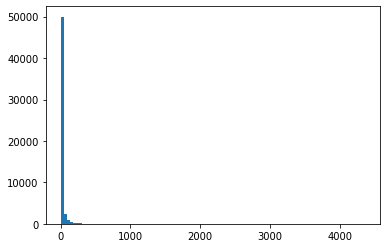

In [19]:
import matplotlib.pyplot as plt

plt.hist(posts.score, bins=100)
plt.show()

In [20]:
posts.score.max()

4367.0

In [21]:
(posts.score>1000).sum()

3

In [11]:
posts.score.isna().sum()

21

Those posts containing `NaN`s in the score column will be assigned the new value `0`.

In [22]:
posts.score.fillna(0, inplace=True)

In [24]:
posts.head(1)

,subreddit,author,url,score,title,selftext,id,permalink
0,Incels,A_World_of_His_Own,https://i.imgur.com/B44LpE8.png,96.0,&gt;mfw,NaN,6f1l9e,/r/Incels/comments/6f1l9e/mfw/


In [26]:
posts.selftext.isna().sum()

12062

In [28]:
posts[posts.selftext=='[removed]'].head(2)

,subreddit,author,url,score,title,selftext,id,permalink
60,Incels,[deleted],https://www.reddit.com/r/Incels/comments/6fz3q...,1.0,"As an incel deserter turned ""normie"" I have a ...",[removed],6fz3qa,/r/Incels/comments/6fz3qa/as_an_incel_deserter...
61,Incels,[deleted],https://www.reddit.com/r/Incels/comments/6igxn...,1.0,63 Reasons I fucking hate reddit,[removed],6igxn4,/r/Incels/comments/6igxn4/63_reasons_i_fucking...


In [29]:
posts[-posts.selftext.isna()].head(2)

,subreddit,author,url,score,title,selftext,id,permalink
17,Incels,Looks-are-everything,https://www.reddit.com/r/Incels/comments/6fjsr...,49.0,Even if you manage to get a girlfriend she can...,This is another reason out of a billion that a...,6fjsrp,/r/Incels/comments/6fjsrp/even_if_you_manage_t...
18,Incels,Drogic,https://www.reddit.com/r/Incels/comments/6fqpp...,0.0,Any Incels Who Aren't Short Or Ugly On Here?,Just have bad genetics and social skills of a ...,6fqpph,/r/Incels/comments/6fqpph/any_incels_who_arent...


The `NaN`s in the `selftext` column will be replaced by `[no_text]`.

In [30]:
posts.selftext.fillna('[no_text]', inplace=True)

In [31]:
posts

,subreddit,author,url,score,title,selftext,id,permalink
0,Incels,A_World_of_His_Own,https://i.imgur.com/B44LpE8.png,96.0,&gt;mfw,[no_text],6f1l9e,/r/Incels/comments/6f1l9e/mfw/
1,Incels,TheEngineer19,http://imgur.com/a/cNCiv,51.0,Lol! PM from a normie,[no_text],6gsmfp,/r/Incels/comments/6gsmfp/lol_pm_from_a_normie/
2,Incels,[deleted],http://imgur.com/3ChBiLl,161.0,cringe anarchy,[no_text],6ggkcw,/r/Incels/comments/6ggkcw/cringe_anarchy/
3,Incels,DeathBeforeNormie,https://www.reddit.com/r/AskMen/comments/6k1x9...,3.0,Normie post from AskMen. First comment is suic...,[no_text],6k7qae,/r/Incels/comments/6k7qae/normie_post_from_ask...
4,Incels,dontcomplain1,https://imgur.com/a/IAzHh,99.0,"Went out for a walk in nature to cope, here ar...",[no_text],6gwgr1,/r/Incels/comments/6gwgr1/went_out_for_a_walk_...
...,...,...,...,...,...,...,...,...
54218,Incels,OGezus,https://www.reddit.com/r/Incels/comments/5syjr...,1.0,tuning in,[removed],5syjro,/r/Incels/comments/5syjro/tuning_in/
54219,Incels,[deleted],https://www.reddit.com/r/Incels/comments/5wm58...,1.0,When did you realize you were a incel ?,[removed],5wm587,/r/Incels/comments/5wm587/when_did_you_realize...
54220,Incels,IncelsAMA,https://www.reddit.com/r/Incels/comments/5vjwh...,1.0,"Hey Incels, I am a girl and I want to help you...",[removed],5vjwhq,/r/Incels/comments/5vjwhq/hey_incels_i_am_a_gi...
54221,Incels,[deleted],https://www.reddit.com/r/Incels/comments/5ung3...,1.0,I think I'm becoming gay.,[removed],5ung39,/r/Incels/comments/5ung39/i_think_im_becoming_...


`permalink` doesnt contain any useful information, thus it will be dropped.

In [32]:
posts.drop(['permalink'], axis=1, inplace=True)

In [33]:
posts

,subreddit,author,url,score,title,selftext,id
0,Incels,A_World_of_His_Own,https://i.imgur.com/B44LpE8.png,96.0,&gt;mfw,[no_text],6f1l9e
1,Incels,TheEngineer19,http://imgur.com/a/cNCiv,51.0,Lol! PM from a normie,[no_text],6gsmfp
2,Incels,[deleted],http://imgur.com/3ChBiLl,161.0,cringe anarchy,[no_text],6ggkcw
3,Incels,DeathBeforeNormie,https://www.reddit.com/r/AskMen/comments/6k1x9...,3.0,Normie post from AskMen. First comment is suic...,[no_text],6k7qae
4,Incels,dontcomplain1,https://imgur.com/a/IAzHh,99.0,"Went out for a walk in nature to cope, here ar...",[no_text],6gwgr1
...,...,...,...,...,...,...,...
54218,Incels,OGezus,https://www.reddit.com/r/Incels/comments/5syjr...,1.0,tuning in,[removed],5syjro
54219,Incels,[deleted],https://www.reddit.com/r/Incels/comments/5wm58...,1.0,When did you realize you were a incel ?,[removed],5wm587
54220,Incels,IncelsAMA,https://www.reddit.com/r/Incels/comments/5vjwh...,1.0,"Hey Incels, I am a girl and I want to help you...",[removed],5vjwhq
54221,Incels,[deleted],https://www.reddit.com/r/Incels/comments/5ung3...,1.0,I think I'm becoming gay.,[removed],5ung39


# COMMENTS

In [34]:
comments.head(3)

,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,...,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,year_month
0,incidentally no,NaN,NaN,NaN,little_milkee,NaN,NaN,1509602236,t5_2y2u1,t3_7a436d,...,NaN,1509602238,0,0,dp88fwg,Incels,NaN,NaN,NaN,2017-11-01 00:00:00 UTC
1,That's when the sexual market begins. Chads an...,NaN,NaN,NaN,BlackPill48,31yo bald manlet escortcel 卐 'Self improvement...,NaN,1509617470,t5_2y2u1,t3_7a9u7k,...,NaN,1509617471,0,0,dp8dyhw,Incels,NaN,NaN,NaN,2017-11-01 00:00:00 UTC
2,Definitely. If you're tall and have an imposin...,NaN,NaN,NaN,BILLXFRANK,NaN,NaN,1509666560,t5_2y2u1,t3_7ad5lb,...,NaN,1509666561,0,0,dp9jtjw,Incels,NaN,NaN,NaN,2017-11-01 00:00:00 UTC


In [35]:
comments.body.isna().sum()

110

`body` column contains the text of the comment, possible `NaN`s will be replaced by `[no_text]`.

In [36]:
comments.body.fillna('[no_text]', inplace=True)

In [39]:
comments.score_hidden.isna().sum(), len(comments)

(1137522, 1137522)

`score_hidden` column will be dropped.

In [40]:
comments.drop(['score_hidden'], axis=1, inplace=True)

In [41]:
comments.archived.isna().sum(), len(comments)

(1137522, 1137522)

Same story

In [42]:
comments.drop(['archived'], axis=1, inplace=True)

In [43]:
comments.head(1)

,body,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,year_month
0,incidentally no,NaN,little_milkee,NaN,NaN,1509602236,t5_2y2u1,t3_7a436d,t1_dp7isb3,NaN,1509602238,0,0,dp88fwg,Incels,NaN,NaN,NaN,2017-11-01 00:00:00 UTC


In [46]:
comments.name.isna().sum()

1137522

Same story

In [47]:
comments.drop(['name'], axis=1, inplace=True)

In [49]:
comments.author.isna().sum()

0

In [50]:
comments.author.value_counts()

[deleted]             252338
AutoModerator           7973
PM_ME_STRIPPERS         7548
StAliaHarkonnen         7423
kazcovic                7295
                       ...  
WavyWavyWaves              1
Jaisyjaysus69              1
blu3slime                  1
MisterMoustache911         1
Bibleisproslavery          1
Name: author, Length: 36162, dtype: int64

Lets invisitige what AutoModerator is commenting

In [57]:
comments[comments.author=='AutoModerator'].body.values[0]

"Personality isn't really that important to most women. They often euphemize personality for muscles and a masculine face. When gangbanger [Jeremy Meeks](http://imgur.com/a/BgWbg) was released from prison for robbing and beating another boy close to death, his girlfriend married and had children with him. Meeks improved his personality so much that he later cheated on and dumped his wife with a rich billionaire heiress and didn't even feel bad about it.\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Incels) if you have any questions or concerns.*"

In [58]:
comments[comments.author=='AutoModerator'].body.values[1]


"'Entitled' is a fairly meaningless word that does not accurately describe most of the incels on this sub or elsewhere on the Internet. On one extreme, the word 'entitled' is used to describe men who literally believe that they should be able to force women to date them. On the other extreme, the word 'entitled' is used to describe men who are merely frustrated or sad that they can't find anyone at all to date them. This type of frustration is reasonable, since sex and romantic relationships are regarded by many as one of the most fulfilling things in life. The problem with using the word 'entitled' for both categories of men is that it lumps them together, demonizing men in the latter category by comparing them to men in the former category. If you wish to criticize our views, please be more specific than merely calling us 'entitled.'\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Incels) if you ha

Those comments written by AutoModerator can be useful later on, e.g. to detect if a comment is reported

In [61]:
comments.downs.isna().sum(), len(comments)

(1137522, 1137522)

`downs` & `ups` columns will be dropped.

In [62]:
comments.drop(['downs', 'ups'], axis=1, inplace=True)

`subreddit_id` can be dropped, thus it doesnt contain any useful information

In [65]:
comments.drop(['subreddit_id'], axis=1, inplace=True)

In [68]:
comments.author_flair_text.isna().sum()

742724

`author_flair_css_class` containing `NaN`s will be replaced by `[no_text]`.

In [75]:
comments.author_flair_text.fillna('[no_text]', inplace=True)

In [71]:
comments.author_flair_css_class.isna().sum(), len(comments)

(1137522, 1137522)

`author_flair_css_class` will be dropped

In [72]:
comments.drop(['author_flair_css_class'], axis=1, inplace=True)

In [77]:
comments.head(2)

,body,author,author_flair_text,created_utc,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,year_month
0,incidentally no,little_milkee,[no_text],1509602236,t3_7a436d,t1_dp7isb3,NaN,1509602238,0,0,dp88fwg,Incels,NaN,NaN,2017-11-01 00:00:00 UTC
1,That's when the sexual market begins. Chads an...,BlackPill48,31yo bald manlet escortcel 卐 'Self improvement...,1509617470,t3_7a9u7k,t3_7a9u7k,NaN,1509617471,0,0,dp8dyhw,Incels,NaN,NaN,2017-11-01 00:00:00 UTC


In [79]:
comments.score.value_counts()

 1.0      315694
 2.0      158157
 3.0      107197
 4.0       53066
 5.0       52397
           ...  
 128.0         1
 358.0         1
 300.0         1
-71.0          1
-127.0         1
Name: score, Length: 321, dtype: int64

In [80]:
comments.score.isna().sum()

119763

In [81]:
comments[comments.score=='0']

,body,author,author_flair_text,created_utc,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,year_month


`NaN`s will be replaced by 0

In [82]:
comments.score.fillna(0, inplace=True)

In [84]:
comments.head(2)

,body,author,author_flair_text,created_utc,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,year_month
0,incidentally no,little_milkee,[no_text],1509602236,t3_7a436d,t1_dp7isb3,0.0,1509602238,0,0,dp88fwg,Incels,NaN,NaN,2017-11-01 00:00:00 UTC
1,That's when the sexual market begins. Chads an...,BlackPill48,31yo bald manlet escortcel 卐 'Self improvement...,1509617470,t3_7a9u7k,t3_7a9u7k,0.0,1509617471,0,0,dp8dyhw,Incels,NaN,NaN,2017-11-01 00:00:00 UTC


both `created_utc` and `retrieved_on` need to be cast as timestamps to ensure their ability to analyzed.

In [92]:
from datetime import datetime

comments.created_utc = comments.created_utc.apply(lambda x: datetime.fromtimestamp(x).isoformat())
comments.retrieved_on = comments.retrieved_on.apply(lambda x: datetime.fromtimestamp(x).isoformat())

In [98]:
comments.head(2)

,body,author,author_flair_text,created_utc,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,distinguished,year_month
0,incidentally no,little_milkee,[no_text],2017-11-02T06:57:16,t3_7a436d,t1_dp7isb3,0.0,2017-11-02T06:57:18,0,0,dp88fwg,Incels,NaN,2017-11-01 00:00:00 UTC
1,That's when the sexual market begins. Chads an...,BlackPill48,31yo bald manlet escortcel 卐 'Self improvement...,2017-11-02T11:11:10,t3_7a9u7k,t3_7a9u7k,0.0,2017-11-02T11:11:11,0,0,dp8dyhw,Incels,NaN,2017-11-01 00:00:00 UTC


In [88]:
comments.controversiality.value_counts()

0    1102927
1      34595
Name: controversiality, dtype: int64

In [96]:
comments.gilded.value_counts()

0    1137478
1         44
Name: gilded, dtype: int64

In [99]:
comments.drop(['year_month'], axis=1, inplace=True)

In [101]:
comments.head()

,body,author,author_flair_text,created_utc,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,distinguished
0,incidentally no,little_milkee,[no_text],2017-11-02T06:57:16,t3_7a436d,t1_dp7isb3,0.0,2017-11-02T06:57:18,0,0,dp88fwg,Incels,NaN
1,That's when the sexual market begins. Chads an...,BlackPill48,31yo bald manlet escortcel 卐 'Self improvement...,2017-11-02T11:11:10,t3_7a9u7k,t3_7a9u7k,0.0,2017-11-02T11:11:11,0,0,dp8dyhw,Incels,NaN
2,Definitely. If you're tall and have an imposin...,BILLXFRANK,[no_text],2017-11-03T00:49:20,t3_7ad5lb,t1_dp9ivus,0.0,2017-11-03T00:49:21,0,0,dp9jtjw,Incels,NaN
3,cope.,PM_ME_STRIPPERS,Subhuman ugly piece of shit that shouldnt exist,2017-11-02T16:34:07,t3_7aanly,t1_dp8gw12,0.0,2017-11-02T16:34:09,0,0,dp8r4o7,Incels,NaN
4,We know why. They consented in exchange for ca...,itsabsolutelyover,Deuteronomy 22:21,2017-11-02T00:21:19,t3_7a7e63,t3_7a7e63,0.0,2017-11-02T00:23:23,0,0,dp7pgca,Incels,NaN


In [103]:
comments.distinguished.isna().sum(), len(comments)

(1129404, 1137522)

In [104]:
comments.drop(['distinguished'], axis=1, inplace=True)

In [105]:
comments

,body,author,author_flair_text,created_utc,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit
0,incidentally no,little_milkee,[no_text],2017-11-02T06:57:16,t3_7a436d,t1_dp7isb3,0.0,2017-11-02T06:57:18,0,0,dp88fwg,Incels
1,That's when the sexual market begins. Chads an...,BlackPill48,31yo bald manlet escortcel 卐 'Self improvement...,2017-11-02T11:11:10,t3_7a9u7k,t3_7a9u7k,0.0,2017-11-02T11:11:11,0,0,dp8dyhw,Incels
2,Definitely. If you're tall and have an imposin...,BILLXFRANK,[no_text],2017-11-03T00:49:20,t3_7ad5lb,t1_dp9ivus,0.0,2017-11-03T00:49:21,0,0,dp9jtjw,Incels
3,cope.,PM_ME_STRIPPERS,Subhuman ugly piece of shit that shouldnt exist,2017-11-02T16:34:07,t3_7aanly,t1_dp8gw12,0.0,2017-11-02T16:34:09,0,0,dp8r4o7,Incels
4,We know why. They consented in exchange for ca...,itsabsolutelyover,Deuteronomy 22:21,2017-11-02T00:21:19,t3_7a7e63,t3_7a7e63,0.0,2017-11-02T00:23:23,0,0,dp7pgca,Incels
...,...,...,...,...,...,...,...,...,...,...,...,...
1137517,It's better than never having anything\n\nThat...,whywouldanyone,[no_text],2016-08-24T05:27:47,t3_4z7ycs,t1_d6u7l4z,-2.0,2016-09-11T07:03:03,0,0,d6u7xry,Incels
1137518,"&gt; Yes, some kids did bully me, harras me, r...",azavii,[no_text],2016-08-24T21:07:41,t3_4zdr5u,t1_d6uyru1,-1.0,2016-09-11T10:00:53,1,0,d6v131t,Incels
1137519,Thanks for your response (not /s).,backfmyb,[no_text],2016-08-21T02:53:39,t3_4yrofw,t1_d6q10eo,-1.0,2016-09-10T15:40:06,1,0,d6q1cfh,Incels
1137520,[deleted],[deleted],[no_text],2016-08-04T18:26:23,t3_4w3s3b,t1_d642pxp,-1.0,2016-09-07T05:42:23,0,0,d643c5x,Incels
